In [9]:
from shapely.geometry import Polygon, box, Point
import geopandas as gpd

# global GeoDataFrame
path = gpd.datasets.get_path("naturalearth_lowres")
df = gpd.read_file(path).set_index("name")

# Europe GeoSeries
eur_window = box(-10.67, 34.5, 31.55, 71.05)
eur = df.intersection(eur_window) # intersects difference?
eur = eur[~eur.is_empty] # why filter?

/tmp/ipykernel_1120469/3744533108.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eur.centroid.plot(ax=ax)


<AxesSubplot:>

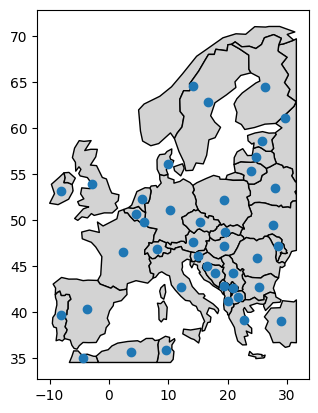

In [14]:
# show the centroid of each country
ax = eur.plot(facecolor="lightgray", edgecolor="k")
eur.centroid.plot(ax=ax)

In [15]:
eur2 = eur.to_crs("EPSG:3035")

In [16]:
eur.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
eur2.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

<AxesSubplot:>

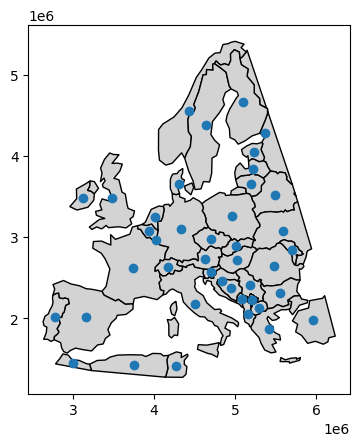

In [18]:
# show the centroid of each country
ax = eur2.plot(facecolor="lightgray", edgecolor="k")
eur2.centroid.plot(ax=ax)

/tmp/ipykernel_1120469/503306300.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eur.centroid.to_crs(eur2.crs).plot(ax=ax, color="r") # red => miscalculation


<AxesSubplot:>

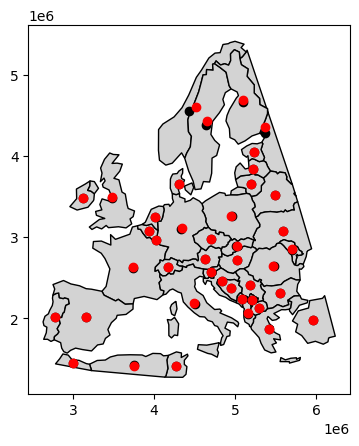

In [22]:
# how bad is it to compute centroids via lat/long
ax = eur2.plot(facecolor="lightgray", edgecolor="k")
eur2.centroid.plot(ax=ax, color="k") # black => correct
eur.centroid.to_crs(eur2.crs).plot(ax=ax, color="r") # red => miscalculation

In [25]:
eur.area

/tmp/ipykernel_1120469/3886553988.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  eur.area


name
Russia              35.748174
Norway              61.455274
France              65.673811
Tunisia              6.540885
Algeria             21.165124
Sweden              79.446214
Belarus             27.622448
Ukraine             35.483088
Poland              40.759231
Austria             10.179604
Hungary             10.980058
Moldova              3.837658
Romania             27.621146
Lithuania            9.022101
Latvia               9.398691
Estonia              6.905922
Germany             45.923594
Bulgaria            12.119548
Greece              13.743985
Turkey              23.109344
Albania              3.185163
Croatia              6.570063
Switzerland          5.440201
Luxembourg           0.301516
Belgium              3.829997
Netherlands          5.264180
Portugal             9.802468
Spain               53.268425
Ireland              7.860299
Italy               34.685652
Denmark              6.168457
United Kingdom      34.202954
Slovenia             2.225310
Finla

In [24]:
# area in sq meters
eur2.area

name
Russia              2.024604e+11
Norway              3.286343e+11
France              5.595585e+11
Tunisia             6.547702e+10
Algeria             2.043067e+11
Sweden              4.505641e+11
Belarus             2.039346e+11
Ukraine             2.857955e+11
Poland              3.103969e+11
Austria             8.506301e+10
Hungary             9.247413e+10
Moldova             3.232099e+10
Romania             2.383473e+11
Lithuania           6.382974e+10
Latvia              6.392371e+10
Estonia             4.467593e+10
Germany             3.574253e+11
Bulgaria            1.102150e+11
Greece              1.319524e+11
Turkey              2.217875e+11
Albania             2.969486e+10
Croatia             5.752945e+10
Switzerland         4.618538e+10
Luxembourg          2.416819e+09
Belgium             3.012566e+10
Netherlands         4.002133e+10
Portugal            9.340841e+10
Spain               5.023083e+11
Ireland             5.845217e+10
Italy               3.150991e+11
Denma

In [29]:
# area in sq miles
# caveat: only the area of the country within the box
(eur2.area / 1000 / 1000 / 2.59).sort_values(ascending=False)

name
France              216045.735320
Spain               193941.416516
Sweden              173962.955903
Germany             138002.030052
Finland             131750.182704
Norway              126885.828356
Italy               121659.867544
Poland              119844.344075
Ukraine             110345.741832
United Kingdom       96519.589998
Romania              92025.972522
Turkey               85632.236650
Algeria              78882.882393
Belarus              78739.245551
Russia               78170.023756
Greece               50946.870966
Bulgaria             42554.046136
Portugal             36065.021674
Hungary              35704.295877
Austria              32842.862855
Czechia              31354.126319
Serbia               29493.813018
Tunisia              25280.702563
Latvia               24680.969176
Lithuania            24644.688797
Ireland              22568.405096
Croatia              22212.141886
Bosnia and Herz.     19538.365073
Slovakia             18172.796262
Switzerla

# Map of Madison Fire and Police Departments

In [36]:
city = gpd.read_file("City_Limit.zip").to_crs("epsg:32616")
city.crs

<Derived Projected CRS: EPSG:32616>
Name: WGS 84 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 90°W and 84°W, northern hemisphere between equator and 84°N, onshore and offshore. Belize. Canada - Manitoba; Nunavut; Ontario. Costa Rica. Cuba. Ecuador - Galapagos. El Salvador. Guatemala. Honduras. Mexico. Nicaragua. United States (USA).
- bounds: (-90.0, 0.0, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [69]:
water = gpd.read_file("Lakes_and_Rivers.zip").to_crs(city.crs)
fire = gpd.read_file("Fire_Stations.zip").to_crs(city.crs)
police = gpd.read_file("Police_Stations.zip").to_crs(city.crs)

In [64]:
url = "https://maps.cityofmadison.com/arcgis/rest/services/Public/OPEN_DATA/MapServer/1/query?outFields=*&where=1%3D1&f=geojson"
fire2 = gpd.read_file(url).to_crs(city.crs)

In [65]:
fire2.head()

,OBJECTID,MCD,EMS,LONG_NAME,SHORT_NAME,FIRE_STATION_NO,FIRE_STATION_STATUS,COMMENT,ADDRESS,URL,geometry
0,40,CITY OF MADISON,Y,Fire Station # 7,# 7,7,A,Active,1810 McKenna Blvd,http://www.cityofmadison.com/fire/stations/sta...,POINT (296500.973 4767501.373)
1,41,CITY OF MADISON,Y,Fire Station # 2,# 2,2,A,Active,421 Grand Canyon Dr,http://www.cityofmadison.com/fire/stations/sta...,POINT (296804.660 4770437.116)
2,42,CITY OF MADISON,N,Fire Station # 9,# 9,9,A,Active,201 N. Midvale Blvd,http://www.cityofmadison.com/fire/stations/sta...,POINT (300480.999 4771334.724)
3,43,CITY OF MADISON,Y,Fire Station # 6,# 6,6,A,Active,825 West Badger Rd,http://www.cityofmadison.com/fire/stations/sta...,POINT (304801.402 4767857.592)
4,44,CITY OF MADISON,Y,Fire Station # 4,# 4,4,A,Active,1437 Monroe St,http://www.cityofmadison.com/fire/stations/sta...,POINT (303650.593 4771228.643)


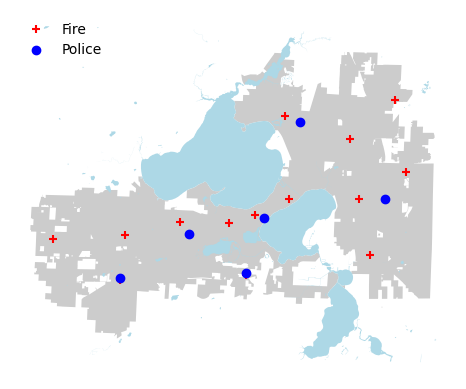

In [73]:
ax = city.plot(color="0.8", linewidth=0)
water.plot(ax=ax, color="lightblue", linewidth=0)
fire2.plot(ax=ax, color="red", marker="+", label="Fire")
police.plot(ax=ax, color="blue", label="Police")
ax.legend(loc="upper left", frameon=False)
ax.set_axis_off()

In [75]:
water.to_file("water.geojson")

# Scrape Fire Department Issues

In [76]:
import requests
url = "https://www.cityofmadison.com/fire/daily-reports"
r = requests.get(url)
r

<Response [200]>

In [77]:
r.raise_for_status() # have an exception if not 200 (e.g., 404)

In [81]:
#import pandas as pd
#pd.read_html(url)

In [78]:
print(r.text)

<!DOCTYPE html>
<html lang="en" dir="ltr" prefix="content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ og: http://ogp.me/ns# rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#">
<head>
  <link rel="profile" href="http://www.w3.org/1999/xhtml/vocab" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
<meta name="Generator" content="Drupal 7 (http://drupal.org)" />
<link rel="canonical" href="/fire/daily-reports" />
<link rel="shortlink" href="/node/31440" />
<meta about="/fire" typeof="skos:Concept" property="rdfs:label skos:prefLabel" content="Fire" />
<link rel="shortcut icon" href="https://www.cityofmadison.com/sites/default/files/template/favicon.ico" type="image/vnd.microsoft.icon" />
    <

In [92]:
import re
#re.findall(r'<span itemprop="streetAddress">E. Geneva Circle</span>', r.text)
addrs = re.findall(r'<span itemprop="streetAddress">(.+?)</span>', r.text)[:-1]
addrs = pd.Series(addrs)
addrs

0                   E. Geneva Circle
1      700 block N. Fair Oaks Avenue
2            2900 block Turbot Drive
3         4200 block Doncaster Drive
4    S. Stoughton Road & Pflaum Road
5            10 block Langdon Street
6              1000 E Washington Ave
7                 3700 Lexington Ave
8         5300 block Congress Avenue
9          6500 block Schroeder Road
dtype: object

In [96]:
formatted_addrs = addrs.str.replace(" block ", " ") + "; Madison, WI"
formatted_addrs

0                   E. Geneva Circle; Madison, WI
1            700 N. Fair Oaks Avenue; Madison, WI
2                  2900 Turbot Drive; Madison, WI
3               4200 Doncaster Drive; Madison, WI
4    S. Stoughton Road & Pflaum Road; Madison, WI
5                  10 Langdon Street; Madison, WI
6              1000 E Washington Ave; Madison, WI
7                 3700 Lexington Ave; Madison, WI
8               5300 Congress Avenue; Madison, WI
9                6500 Schroeder Road; Madison, WI
dtype: object

In [101]:
incidents = gpd.tools.geocode(formatted_addrs, provider="nominatim", user_agent="cs320bot").dropna()

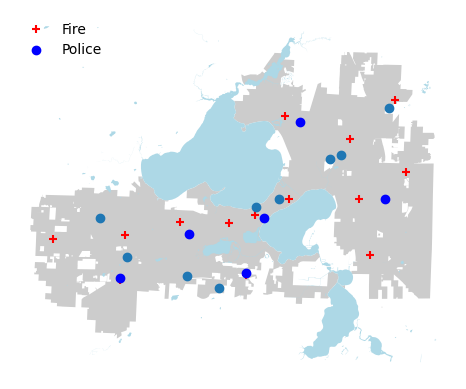

In [103]:
ax = city.plot(color="0.8", linewidth=0)
water.plot(ax=ax, color="lightblue", linewidth=0)
fire2.plot(ax=ax, color="red", marker="+", label="Fire")
police.plot(ax=ax, color="blue", label="Police")
incidents.to_crs(city.crs).plot(ax=ax)
ax.legend(loc="upper left", frameon=False)
ax.set_axis_off()